# Semana 2

<div align="center">
<img src="https://i.imgur.com/oxab3uu.png" width="800px" />
</div>

##### Sumário:
1. Introdução (Bibliotecas, importando os dados, Traduzindo o nome das colunas)

2. Análise inicial dos dados

3. Limpeza dos dados 

4. Tratamento dos dados

5. Separação de dados (treino e teste)

6. Aprendizado 

7. Exportando modelos


## 1. Introdução

Na semana 2 utilizamos o Python para construir um modelo de Machine Learning que pudesse predizer de acordo com os dados bancários de cada cliente, se ele pode ou não se tornar inadimplente. 

### Bibliotecas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import recall_score


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

### importando os dados

In [2]:
#url = 'https://raw.githubusercontent.com/leoalvessantana/Challenge-DataScience/main/Semana1/dados_juntos.csv'
url = '..\Semana1\dados_juntos.csv'
dados = pd.read_csv(url)

dados.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,26.0,84996.0,Rent,0.0,Medical,B,9000.0,11.26,0.0,0.11,N,2.0
1,24.0,55782.0,Rent,3.0,Homeimprovement,A,17000.0,7.51,0.0,0.30,N,2.0
2,25.0,125000.0,Own,9.0,Personal,B,25000.0,10.59,0.0,0.20,N,2.0
3,23.0,44340.0,Own,0.0,Venture,C,3000.0,12.98,0.0,0.07,Y,3.0
4,23.0,48000.0,Mortgage,5.0,Education,C,5000.0,13.99,0.0,0.10,Y,2.0


### Traduzindo o nome das colunas

In [3]:
dicionario = {
    'person_age': 'idade',
    'person_income': 'salario',
    'person_home_ownership': 'situacao_moradia',
    'person_emp_length': 'tempo_trabalho',
    'loan_intent': 'motivo_emprestimo',
    'loan_grade': 'pontuacao_emprestimo',
    'loan_amnt': 'valor_emprestimo',
    'loan_int_rate': 'taxa_juros',
    'loan_status': 'inadimplencia',
    'loan_percent_income': 'renda_percentual_emprestimo',
    'cb_person_default_on_file': 'devendo',
    'cb_person_cred_hist_length': 'tempo_de_credito'
}
     
dados.rename(dicionario, axis = 1, inplace = True)

dados.head()

,idade,salario,situacao_moradia,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,devendo,tempo_de_credito
0,26.0,84996.0,Rent,0.0,Medical,B,9000.0,11.26,0.0,0.11,N,2.0
1,24.0,55782.0,Rent,3.0,Homeimprovement,A,17000.0,7.51,0.0,0.30,N,2.0
2,25.0,125000.0,Own,9.0,Personal,B,25000.0,10.59,0.0,0.20,N,2.0
3,23.0,44340.0,Own,0.0,Venture,C,3000.0,12.98,0.0,0.07,Y,3.0
4,23.0,48000.0,Mortgage,5.0,Education,C,5000.0,13.99,0.0,0.10,Y,2.0


## 2. Análise inicial dos dados

Aqui buscamos entender melhor nossos dados, buscando identificar valores inconsistentes, presença de outliers e dados nulos que podem prejudicar o modelo de aprendizado de máquina.



In [4]:
# Analisando o tamanho da nossa base de dados, se existe dados nulos e o tipo das colunas do conjunto de dados:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34501 entries, 0 to 34500
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        34177 non-null  float64
 1   salario                      34162 non-null  float64
 2   situacao_moradia             34170 non-null  object 
 3   tempo_trabalho               33247 non-null  float64
 4   motivo_emprestimo            34186 non-null  object 
 5   pontuacao_emprestimo         34188 non-null  object 
 6   valor_emprestimo             34170 non-null  float64
 7   taxa_juros                   30871 non-null  float64
 8   inadimplencia                34158 non-null  float64
 9   renda_percentual_emprestimo  34182 non-null  float64
 10  devendo                      34131 non-null  object 
 11  tempo_de_credito             34497 non-null  float64
dtypes: float64(8), object(4)
memory usage: 3.2+ MB


* A base de dados tem 34501 linhas e 12 colunas.

* É possível identificar que nas colunas existem dados nulos, que deverão ser tratadas posteriormente.

* As variáveis situacao_moradia, motivo_emprestimo, pontuacao_emprestimo e devendo apresentam o dtype object e deverão passar por algum tratamento para serem utilizados na etapa de modelagem.


In [5]:
# Analise estatistica das variáveis numéricas:
dados.describe().round(2)

,idade,salario,tempo_trabalho,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,tempo_de_credito
count,34177.00,34162.00,33247.00,34170.00,30871.00,34158.00,34182.00,34497.00
mean,27.73,66028.69,4.79,9590.58,11.01,0.22,0.17,5.81
std,6.35,61405.06,4.14,6320.43,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38493.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


* Percebe-se que existem valores muito discrepantes nas variaveis idade e tempo_trabalho. Uma idade de 144 e um tempo de trabalho de 123 anos não fazem muito sentido e vão ser removidos futuramente.

---


Vamos checar os dados únicos de cada uma das variáveis categóricas para identificar se há a presença de valores nulos e a quantidade de categorias de cada uma das colunas, indicando qual tratamento precisa ser feito antes de seguir para a modelagem.



In [6]:
dados['situacao_moradia'].unique()

array(['Rent', 'Own', 'Mortgage', nan, 'Other'], dtype=object)

In [7]:
dados['motivo_emprestimo'].unique()

array(['Medical', 'Homeimprovement', 'Personal', 'Venture', 'Education',
       'Debtconsolidation', nan], dtype=object)

In [8]:
dados['pontuacao_emprestimo'].unique()

array(['B', 'A', 'C', 'E', 'D', nan, 'F', 'G'], dtype=object)

In [9]:
dados['devendo'].unique()

array(['N', 'Y', nan], dtype=object)

In [10]:
colunas_nulas = dados[['situacao_moradia', 'motivo_emprestimo', 'pontuacao_emprestimo', 'devendo']].isnull().sum()

print(f'Colunas com dados nulos: \n{colunas_nulas}')

Colunas com dados nulos: 
situacao_moradia        331
motivo_emprestimo       315
pontuacao_emprestimo    313
devendo                 370
dtype: int64


In [11]:
#  variável alvo
dados['inadimplencia'].value_counts()

0.0    26705
1.0     7453
Name: inadimplencia, dtype: int64

* É possível identificar que a variável alvo é desbalanceada, o que pode acarretar em problemas na etapa de modelagem.

* Podemos utilizar técnicas para realizar o balançeamento de dados posteriomente.

## 3. Limpeza dos dados

Nessa seção removemos os dados nulos e inconsistentes, após isso analisamos a porcentagem de dados perdidos nesse processo. 

In [12]:
# Quantidade de dados nulos por coluna
dados.isna().sum()

idade                           324
salario                         339
situacao_moradia                331
tempo_trabalho                 1254
motivo_emprestimo               315
pontuacao_emprestimo            313
valor_emprestimo                331
taxa_juros                     3630
inadimplencia                   343
renda_percentual_emprestimo     319
devendo                         370
tempo_de_credito                  4
dtype: int64

In [13]:
# excluindo os dados nulos
dados.dropna(inplace = True)

print(f'A quantidade de registros inicial era de 34501, após a remoção dos dados nulos ficamos com {dados.shape[0]}')

A quantidade de registros inicial era de 34501, após a remoção dos dados nulos ficamos com 28638


Agora vamos remover os dados discrepantes do conjunto de dados.



In [14]:
dados[(dados['idade'] > 100)]

,idade,salario,situacao_moradia,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,devendo,tempo_de_credito
180,144.0,200000.0,Mortgage,4.0,Education,B,6000.0,11.86,0.0,0.03,N,2.0
11559,144.0,250000.0,Rent,4.0,Venture,C,4800.0,13.57,0.0,0.02,N,3.0
30413,144.0,6000000.0,Mortgage,12.0,Personal,C,5000.0,12.73,0.0,0.00,N,25.0
33098,123.0,80004.0,Rent,2.0,Education,B,20400.0,10.25,0.0,0.25,N,3.0


In [15]:
dados[(dados['tempo_trabalho'] > 90)]


,idade,salario,situacao_moradia,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,devendo,tempo_de_credito
7074,22.0,59000.0,Rent,123.0,Personal,D,35000.0,16.02,1.0,0.59,Y,3.0
8954,21.0,192000.0,Mortgage,123.0,Venture,A,20000.0,6.54,0.0,0.10,N,4.0


In [16]:
dados = dados[(dados['idade'] < 100) & (dados['tempo_trabalho'] < 90)]
dados

,idade,salario,situacao_moradia,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,devendo,tempo_de_credito
0,26.0,84996.0,Rent,0.0,Medical,B,9000.0,11.26,0.0,0.11,N,2.0
1,24.0,55782.0,Rent,3.0,Homeimprovement,A,17000.0,7.51,0.0,0.30,N,2.0
2,25.0,125000.0,Own,9.0,Personal,B,25000.0,10.59,0.0,0.20,N,2.0
3,23.0,44340.0,Own,0.0,Venture,C,3000.0,12.98,0.0,0.07,Y,3.0
4,23.0,48000.0,Mortgage,5.0,Education,C,5000.0,13.99,0.0,0.10,Y,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34496,21.0,120000.0,Rent,4.0,Debtconsolidation,B,10000.0,9.99,0.0,0.08,N,3.0
34497,22.0,87000.0,Rent,5.0,Debtconsolidation,C,20000.0,13.85,0.0,0.23,N,4.0
34498,27.0,69996.0,Rent,1.0,Personal,B,6000.0,11.86,0.0,0.09,N,6.0
34499,23.0,100000.0,Mortgage,7.0,Medical,B,25000.0,11.71,0.0,0.25,N,3.0


In [17]:
print(f'Quantidade de registros final: {dados.shape[0]}')

Quantidade de registros final: 28632


* A quantidade de registros inicial era de 34501, depois de todas as remoções ficamos com 28632. Portanto, foram removidos 5869 registros, ou seja, aproximadamente 17% do conjunto de dados inicial.



## 4. Tratamento dos dados

Agora se inicia o processo de tratamento de dados para que possam ser usados na etapa de modelagem.

As variáveis categóricas serão transformadas em variáveis dummy e as variáveis serão normalizadas para ficarem em uma mesma escala para que variáveis com escalas maiores não tenham peso maior que as outras.

In [18]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28632 entries, 0 to 34500
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        28632 non-null  float64
 1   salario                      28632 non-null  float64
 2   situacao_moradia             28632 non-null  object 
 3   tempo_trabalho               28632 non-null  float64
 4   motivo_emprestimo            28632 non-null  object 
 5   pontuacao_emprestimo         28632 non-null  object 
 6   valor_emprestimo             28632 non-null  float64
 7   taxa_juros                   28632 non-null  float64
 8   inadimplencia                28632 non-null  float64
 9   renda_percentual_emprestimo  28632 non-null  float64
 10  devendo                      28632 non-null  object 
 11  tempo_de_credito             28632 non-null  float64
dtypes: float64(8), object(4)
memory usage: 2.8+ MB


In [19]:
# Alterando o tipo de dado da variável 'tempo_trabalho' para tipo inteiro.

dados['tempo_trabalho'] = dados['tempo_trabalho'].astype('int64')
dados.head()

,idade,salario,situacao_moradia,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,devendo,tempo_de_credito
0,26.0,84996.0,Rent,0,Medical,B,9000.0,11.26,0.0,0.11,N,2.0
1,24.0,55782.0,Rent,3,Homeimprovement,A,17000.0,7.51,0.0,0.30,N,2.0
2,25.0,125000.0,Own,9,Personal,B,25000.0,10.59,0.0,0.20,N,2.0
3,23.0,44340.0,Own,0,Venture,C,3000.0,12.98,0.0,0.07,Y,3.0
4,23.0,48000.0,Mortgage,5,Education,C,5000.0,13.99,0.0,0.10,Y,2.0


Vamos extrair a correlação entre as variáveis para entender se há alguma relação direta ou indireta entre as variáveis.

In [20]:
dados.corr()

,idade,salario,tempo_trabalho,valor_emprestimo,taxa_juros,inadimplencia,renda_percentual_emprestimo,tempo_de_credito
idade,1.000000,0.141471,0.176054,0.056061,0.010370,-0.022498,-0.039476,0.877581
salario,0.141471,1.000000,0.160952,0.324766,-0.003767,-0.167028,-0.297635,0.122787
tempo_trabalho,0.176054,0.160952,1.000000,0.108390,-0.058263,-0.086486,-0.060099,0.151571
valor_emprestimo,0.056061,0.324766,0.108390,1.000000,0.145895,0.113363,0.577197,0.045580
taxa_juros,0.010370,-0.003767,-0.058263,0.145895,1.000000,0.339307,0.123401,0.015330
inadimplencia,-0.022498,-0.167028,-0.086486,0.113363,0.339307,1.000000,0.379534,-0.015575
renda_percentual_emprestimo,-0.039476,-0.297635,-0.060099,0.577197,0.123401,0.379534,1.000000,-0.029814
tempo_de_credito,0.877581,0.122787,0.151571,0.045580,0.015330,-0.015575,-0.029814,1.000000


* A variável renda_percentual_emprestimo tem uma correlação alta de aproximadamente 58% com valor_emprestimo, isso acontece pois essa variável é construída utilizando o salário e o valor do empréstimo solicitado pelo cliente. 

Dessa forma, iremos remover a coluna renda_percentual_emprestimo, para não haver informação duplicada no conjunto de dados.



In [21]:
dados2 = dados.drop('renda_percentual_emprestimo', axis = 1)

dados2.head()

,idade,salario,situacao_moradia,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,devendo,tempo_de_credito
0,26.0,84996.0,Rent,0,Medical,B,9000.0,11.26,0.0,N,2.0
1,24.0,55782.0,Rent,3,Homeimprovement,A,17000.0,7.51,0.0,N,2.0
2,25.0,125000.0,Own,9,Personal,B,25000.0,10.59,0.0,N,2.0
3,23.0,44340.0,Own,0,Venture,C,3000.0,12.98,0.0,Y,3.0
4,23.0,48000.0,Mortgage,5,Education,C,5000.0,13.99,0.0,Y,2.0


Na etapa 2 vimos que as colunas devendo, situacao_moradia, motivo_emprestimo e pontuacao_emprestimo são variaveis categóricas. Para que possamos fazer previsões com esses dados antes precisamos mudar essas variaveis categóricas para dummys.

Como a variavel 'devendo' possui apenas 2 classes. Então vamos substituir os valores da coluna para 0 e 1.

In [22]:
# variavel 'devendo'
a = {
    'N': 0,
    'Y': 1
}

dados2['devendo'] = dados2['devendo'].map(a)

dados2.head()

,idade,salario,situacao_moradia,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,devendo,tempo_de_credito
0,26.0,84996.0,Rent,0,Medical,B,9000.0,11.26,0.0,0,2.0
1,24.0,55782.0,Rent,3,Homeimprovement,A,17000.0,7.51,0.0,0,2.0
2,25.0,125000.0,Own,9,Personal,B,25000.0,10.59,0.0,0,2.0
3,23.0,44340.0,Own,0,Venture,C,3000.0,12.98,0.0,1,3.0
4,23.0,48000.0,Mortgage,5,Education,C,5000.0,13.99,0.0,1,2.0


As variáveis categóricas com mais de 2 categorias precisam passar por um processo de construção de novas colunas. Cada uma das novas colunas corresponde a uma das categorias e o valor será 1 caso o registro tenha a presença da característica e 0 caso contrário. Faremos a criação dessas novas colunas com o **OneHotEncoder**.

In [23]:
# Fazendo a divisão das variáveis. Sendo que a variável alvo é a inadimplencia.

x = dados2.drop(['inadimplencia'], axis = 1)
y = dados2['inadimplencia']

In [25]:
# Transformando as colunas categoricas com o OneHotEncoder

colunas_categoricas = ['situacao_moradia','motivo_emprestimo','pontuacao_emprestimo']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(), colunas_categoricas),
    remainder='passthrough')

x_transformados = one_hot_enc.fit_transform(x)
x_transformados = pd.DataFrame(x_transformados, columns=one_hot_enc.get_feature_names_out())
x_transformados.head()

,onehotencoder__situacao_moradia_Mortgage,onehotencoder__situacao_moradia_Other,onehotencoder__situacao_moradia_Own,onehotencoder__situacao_moradia_Rent,onehotencoder__motivo_emprestimo_Debtconsolidation,onehotencoder__motivo_emprestimo_Education,onehotencoder__motivo_emprestimo_Homeimprovement,onehotencoder__motivo_emprestimo_Medical,onehotencoder__motivo_emprestimo_Personal,onehotencoder__motivo_emprestimo_Venture,...,onehotencoder__pontuacao_emprestimo_E,onehotencoder__pontuacao_emprestimo_F,onehotencoder__pontuacao_emprestimo_G,remainder__idade,remainder__salario,remainder__tempo_trabalho,remainder__valor_emprestimo,remainder__taxa_juros,remainder__devendo,remainder__tempo_de_credito
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,26.0,84996.0,0.0,9000.0,11.26,0.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.0,55782.0,3.0,17000.0,7.51,0.0,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,25.0,125000.0,9.0,25000.0,10.59,0.0,2.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,23.0,44340.0,0.0,3000.0,12.98,1.0,3.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,23.0,48000.0,5.0,5000.0,13.99,1.0,2.0


**Normalização dos dados**

A escala das variáveis numéricas do conjunto de dados é muito diferente e pode gerar um viés no modelo de machine learning. Desse modo, vamos normalizar os dados, colocando todos em uma mesma escala.

In [26]:
scaler = MinMaxScaler()

scaler.fit(x_transformados)

x_transformados = pd.DataFrame(x_transformados, columns = one_hot_enc.get_feature_names_out())
x_transformados


,onehotencoder__situacao_moradia_Mortgage,onehotencoder__situacao_moradia_Other,onehotencoder__situacao_moradia_Own,onehotencoder__situacao_moradia_Rent,onehotencoder__motivo_emprestimo_Debtconsolidation,onehotencoder__motivo_emprestimo_Education,onehotencoder__motivo_emprestimo_Homeimprovement,onehotencoder__motivo_emprestimo_Medical,onehotencoder__motivo_emprestimo_Personal,onehotencoder__motivo_emprestimo_Venture,...,onehotencoder__pontuacao_emprestimo_E,onehotencoder__pontuacao_emprestimo_F,onehotencoder__pontuacao_emprestimo_G,remainder__idade,remainder__salario,remainder__tempo_trabalho,remainder__valor_emprestimo,remainder__taxa_juros,remainder__devendo,remainder__tempo_de_credito
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,26.0,84996.0,0.0,9000.0,11.26,0.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.0,55782.0,3.0,17000.0,7.51,0.0,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,25.0,125000.0,9.0,25000.0,10.59,0.0,2.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,23.0,44340.0,0.0,3000.0,12.98,1.0,3.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,23.0,48000.0,5.0,5000.0,13.99,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28627,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,120000.0,4.0,10000.0,9.99,0.0,3.0
28628,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.0,87000.0,5.0,20000.0,13.85,0.0,4.0
28629,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,27.0,69996.0,1.0,6000.0,11.86,0.0,6.0
28630,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,23.0,100000.0,7.0,25000.0,11.71,0.0,3.0


## 5. Separação de dados (treino e teste)

Para realizar a validação de dados e conseguir avaliar se o modelo está se saindo bem, vamos dividir os dados em conjuntos de treinamento e teste.

In [27]:
SEED = 144  # semente

x_treino, x_teste, y_treino, y_teste = train_test_split(x_transformados, y, random_state = SEED)


base_treino = x_treino.shape[0]
base_teste = x_teste.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino,base_teste))

A base de treino tem 21474 elementos e a base de teste tem 7158 elementos.


## 6. Aprendizado

Como visto na etapa 2, a variável alvo que é a inadimplencia se encontra desbalanceada. Dessa forma, usaremos duas técnicas de balanceamento de dados, uma de Oversampling e outra de Undersampling, essas duas estratégias serão comparadas com a utilização de 2 algoritmos diferentes (Árvore de Decisão e Regressão Logística). Esses modelos são muito utilizados para o tipo de problema de negócio que desejamos resolver, que é a análise de risco de inadimplência.

A métrica principal a ser analisada é o recall, que indica a proporção de clientes que são inadimplentes mas o modelo não detectou, que podem gerar grande prejuízo para a empresa.

### Aprendizado Oversampling
Vamos utilizar a técnica de oversampling SMOTE para balancear a variável alvo, construindo dados sintéticos da categoria com menos frequência.

In [28]:
smote = SMOTE(random_state = SEED)
X_balanceado_over, y_balanceado_over = smote.fit_resample(x_treino, y_treino)
X_balanceado_over

,onehotencoder__situacao_moradia_Mortgage,onehotencoder__situacao_moradia_Other,onehotencoder__situacao_moradia_Own,onehotencoder__situacao_moradia_Rent,onehotencoder__motivo_emprestimo_Debtconsolidation,onehotencoder__motivo_emprestimo_Education,onehotencoder__motivo_emprestimo_Homeimprovement,onehotencoder__motivo_emprestimo_Medical,onehotencoder__motivo_emprestimo_Personal,onehotencoder__motivo_emprestimo_Venture,...,onehotencoder__pontuacao_emprestimo_E,onehotencoder__pontuacao_emprestimo_F,onehotencoder__pontuacao_emprestimo_G,remainder__idade,remainder__salario,remainder__tempo_trabalho,remainder__valor_emprestimo,remainder__taxa_juros,remainder__devendo,remainder__tempo_de_credito
0,0.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,...,1.0,0.0,0.0,39.000000,56000.000000,0.000000,4800.000000,16.700000,1.000000,12.000000
1,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.0,32.000000,65453.000000,15.000000,5000.000000,11.280000,1.000000,9.000000
2,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,...,0.0,0.0,0.0,32.000000,81400.000000,2.000000,20000.000000,14.840000,1.000000,6.000000
3,0.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,29.000000,59004.000000,0.000000,4800.000000,11.490000,0.000000,7.000000
4,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,30.000000,25800.000000,7.000000,6000.000000,5.990000,0.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33583,0.000000,0.0,0.0,1.000000,0.599661,0.0,0.0,0.000000,0.0,0.400339,...,0.0,0.0,0.0,21.000000,30000.000000,2.199322,2459.966092,10.883170,0.400339,3.199322
33584,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.729528,0.0,0.270472,...,0.0,0.0,0.0,33.483861,91313.149978,16.672444,19783.622212,14.299056,1.000000,9.836222
33585,0.875298,0.0,0.0,0.124702,1.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,22.498809,33297.505956,5.748213,5284.471787,14.530143,0.000000,4.000000
33586,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.970470,0.0,0.029530,...,0.0,0.0,0.0,21.295303,24000.000000,1.940939,4011.812100,14.863034,1.000000,2.177182


Tinhamos 28632 linhas, com o processo de Oversampling fomos para 33588 linhas.



#### LogisticRegression

In [29]:
regressao_log = LogisticRegression(random_state=SEED, max_iter=1000) # max_iter é o numero de interações do modelo
regressao_log.fit(X_balanceado_over, y_balanceado_over)

previsao_regressao_log = regressao_log.predict(x_teste)

In [30]:
print(classification_report(y_teste, previsao_regressao_log)) 

              precision    recall  f1-score   support

         0.0       0.92      0.68      0.78      5636
         1.0       0.39      0.78      0.52      1522

    accuracy                           0.70      7158
   macro avg       0.66      0.73      0.65      7158
weighted avg       0.81      0.70      0.73      7158



Matriz de confusão

C:\Users\leona\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


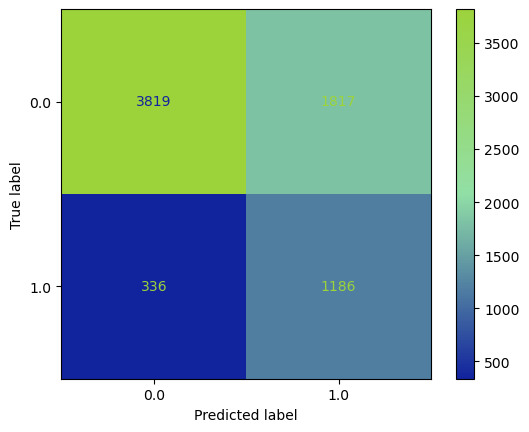

In [31]:
mapa_calor = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#12239e","#92dfa6","#9cd33b"])
matriz_confusao = plot_confusion_matrix(regressao_log, x_teste, y_teste, cmap=mapa_calor)
matriz_confusao

Agora usando a curva ROC para avaliar o resultado do algoritmo.

roc_auc 0.8076987015142938


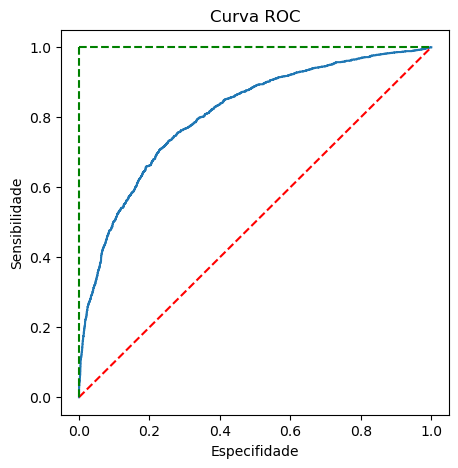

In [32]:
prob_previsao = regressao_log.predict_proba(x_teste)[:,1]

#Sendo:
#tfp = taxa falsos positivos  (Especifidade)
#tvp = taxa verdadeiros positivos   (Sensibilidade)

tfp, tvp, limite = roc_curve(y_teste, prob_previsao)  # roc_curve: desenha a curva roc
print('roc_auc', roc_auc_score(y_teste, prob_previsao)) #  roc_auc_score: calcula a area sobre a curva roc

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()



Existe uma convenção estatistica que utiliza a área sob a curva ROC e ela nós diz o seguinte:

área < 0,7: baixa discriminiação

0,7 ≤ área < 0,8: discriminação aceitável

0,8 ≤ área < 0,9: discriminação excelente

área > 0,9: discriminação excepcional

Potanto, podemos concluir que temos uma **discriminação excelente** já que a área > 0.8.

#### DecisionTreeClassifier


In [33]:
arvore = DecisionTreeClassifier(random_state=SEED)
arvore.fit(X_balanceado_over, y_balanceado_over)
previsao_arvore = arvore.predict(x_teste)

In [34]:
print(classification_report(y_teste, previsao_arvore))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      5636
         1.0       0.71      0.75      0.73      1522

    accuracy                           0.88      7158
   macro avg       0.82      0.83      0.83      7158
weighted avg       0.88      0.88      0.88      7158



Matriz de confusão

C:\Users\leona\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


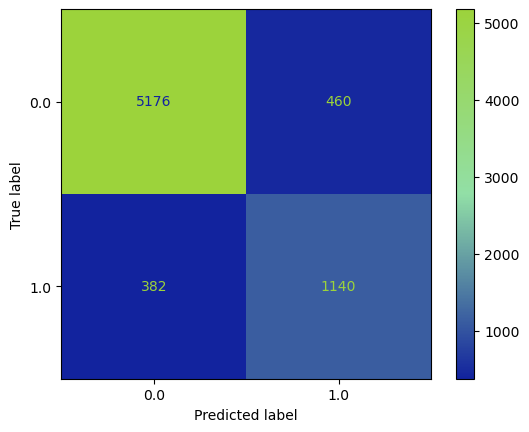

In [35]:
matriz_confusao = plot_confusion_matrix(arvore, x_teste, y_teste, cmap=mapa_calor)
matriz_confusao

Agora usando a curva ROC para avaliar o resultado do algoritmo.

roc_auc 0.8336981428753955


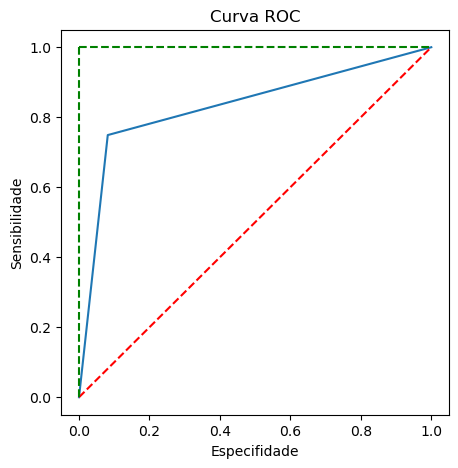

In [36]:
prob_previsao = arvore.predict_proba(x_teste)[:,1]

#Sendo:
#tfp = taxa falsos positivos  (Especifidade)
#tvp = taxa verdadeiros positivos   (Sensibilidade)

tfp, tvp, limite = roc_curve(y_teste, prob_previsao)  # roc_curve: desenha a curva roc
print('roc_auc', roc_auc_score(y_teste, prob_previsao)) #  roc_auc_score: calcula a area sobre a curva roc

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()



Potanto, podemos concluir que temos uma **discriminação excelente** já que a área > 0.8.

---

Salvando os resultados dos modelos utilizando a técnica de oversampling para posterior comparação com a técnica de undersampling.



In [37]:
metricas_over = pd.DataFrame({'Acurácia treino':[arvore.score(x_treino, y_treino), 
                                 regressao_log.score(x_treino, y_treino)], 
            'Acurácia teste': [arvore.score(x_teste, y_teste), 
                                 regressao_log.score(x_teste, y_teste)], 
            'Recall':[recall_score(y_teste, previsao_arvore),
                      recall_score(y_teste, previsao_regressao_log)]},
             index = ['Árvore de Decisão Oversampling', 'Regressão Logísitica Oversampling'])    


### Aprendizado Undersampling

Agora será realizado o balanceamento da variável alvo utilizando a técnica de undersampling, que removerá aleatoriamente registros da classe mais frequente, igualando a quantidade de registros das duas classes.

In [38]:
under = RandomUnderSampler(random_state=SEED,sampling_strategy=0.5)
X_balanceado_under, y_balanceado_under = under.fit_resample(x_treino, y_treino)
X_balanceado_under

,onehotencoder__situacao_moradia_Mortgage,onehotencoder__situacao_moradia_Other,onehotencoder__situacao_moradia_Own,onehotencoder__situacao_moradia_Rent,onehotencoder__motivo_emprestimo_Debtconsolidation,onehotencoder__motivo_emprestimo_Education,onehotencoder__motivo_emprestimo_Homeimprovement,onehotencoder__motivo_emprestimo_Medical,onehotencoder__motivo_emprestimo_Personal,onehotencoder__motivo_emprestimo_Venture,...,onehotencoder__pontuacao_emprestimo_E,onehotencoder__pontuacao_emprestimo_F,onehotencoder__pontuacao_emprestimo_G,remainder__idade,remainder__salario,remainder__tempo_trabalho,remainder__valor_emprestimo,remainder__taxa_juros,remainder__devendo,remainder__tempo_de_credito
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,22.0,100000.0,3.0,1200.0,8.59,0.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,24.0,30000.0,1.0,4000.0,7.49,0.0,4.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,32.0,135000.0,16.0,13000.0,7.88,0.0,5.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,36.0,46000.0,3.0,8000.0,5.42,0.0,15.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.0,57000.0,4.0,12875.0,7.90,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,28.0,42000.0,4.0,2000.0,14.96,1.0,6.0
14036,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,28.0,35000.0,3.0,7950.0,15.62,0.0,10.0
14037,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,30.0,50000.0,4.0,16000.0,16.77,0.0,5.0
14038,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.0,21600.0,0.0,9600.0,7.49,0.0,2.0


Tinhamos 28632 linhas, com o processo de Undersampling fomos para 14040 linhas.



#### LogisticRegression

In [39]:
regressao_log = LogisticRegression(random_state=SEED, max_iter=1000) # max_iter é o numero de interações do modelo
regressao_log.fit(X_balanceado_under, y_balanceado_under)

previsao_regressao_log = regressao_log.predict(x_teste)

In [40]:
print(classification_report(y_teste, previsao_regressao_log)) 

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      5636
         1.0       0.54      0.57      0.55      1522

    accuracy                           0.80      7158
   macro avg       0.71      0.72      0.71      7158
weighted avg       0.81      0.80      0.81      7158



Matriz de confusão

C:\Users\leona\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


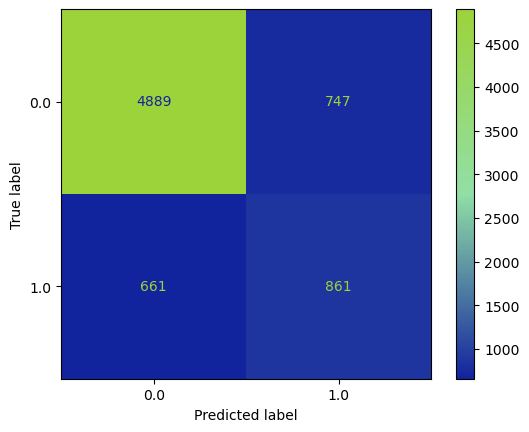

In [41]:
mapa_calor = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#12239e","#92dfa6","#9cd33b"])
matriz_confusao = plot_confusion_matrix(regressao_log, x_teste, y_teste, cmap=mapa_calor)
matriz_confusao

Agora usando a curva ROC para avaliar o resultado do algoritmo.

roc_auc 0.8064636805443511


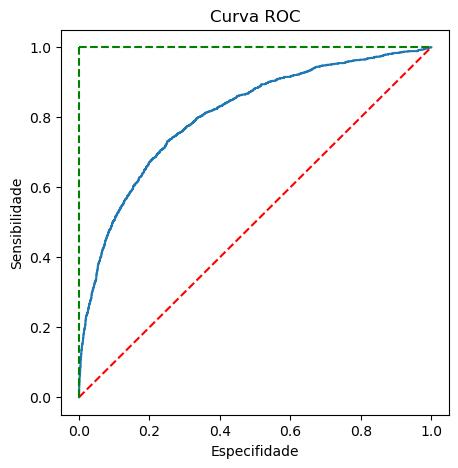

In [42]:
prob_previsao = regressao_log.predict_proba(x_teste)[:,1]

#Sendo:
#tfp = taxa falsos positivos  (Especifidade)
#tvp = taxa verdadeiros positivos   (Sensibilidade)

tfp, tvp, limite = roc_curve(y_teste, prob_previsao)  # roc_curve: desenha a curva roc
print('roc_auc', roc_auc_score(y_teste, prob_previsao)) #  roc_auc_score: calcula a area sobre a curva roc

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()



#### DecisionTreeClassifier

In [43]:
arvore = DecisionTreeClassifier(random_state=SEED)
arvore.fit(X_balanceado_under, y_balanceado_under)
previsao_arvore = arvore.predict(x_teste)

In [44]:
print(classification_report(y_teste, previsao_arvore))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91      5636
         1.0       0.63      0.77      0.70      1522

    accuracy                           0.86      7158
   macro avg       0.78      0.83      0.80      7158
weighted avg       0.87      0.86      0.86      7158



Matriz de confusão

C:\Users\leona\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


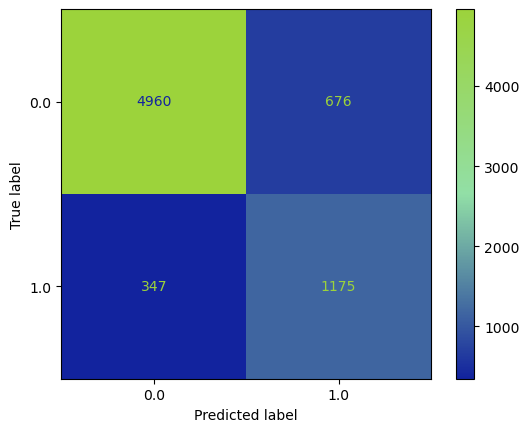

In [45]:
matriz_confusao = plot_confusion_matrix(arvore, x_teste, y_teste, cmap=mapa_calor)
matriz_confusao

Agora usando a curva ROC para avaliar o resultado do algoritmo.

roc_auc 0.826033645170105


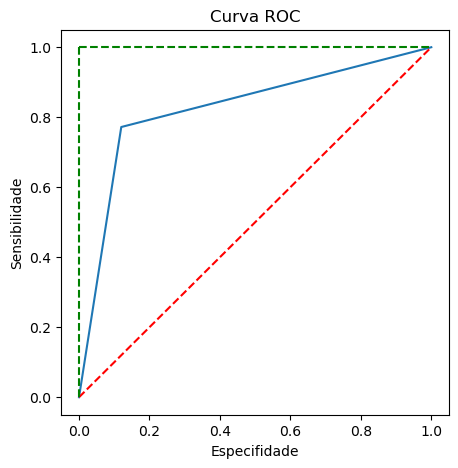

In [46]:
prob_previsao = arvore.predict_proba(x_teste)[:,1]

#Sendo:
#tfp = taxa falsos positivos  (Especifidade)
#tvp = taxa verdadeiros positivos   (Sensibilidade)

tfp, tvp, limite = roc_curve(y_teste, prob_previsao)  # roc_curve: desenha a curva roc
print('roc_auc', roc_auc_score(y_teste, prob_previsao)) #  roc_auc_score: calcula a area sobre a curva roc

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()



Salvando os resultados dos modelos utilizando a técnica de undersampling:

In [47]:
metricas_under = pd.DataFrame({'Acurácia treino':[arvore.score(x_treino, y_treino), 
                                 regressao_log.score(x_treino, y_treino)], 
            'Acurácia teste': [arvore.score(x_teste, y_teste), 
                                 regressao_log.score(x_teste, y_teste)], 
            'Recall':[recall_score(y_teste, previsao_arvore),
                      recall_score(y_teste, previsao_regressao_log)]},
             index = ['Árvore de Decisão Undersampling', 'Regressão Logísitica Undersampling'])
    

### Comparação


In [48]:
display(metricas_over,metricas_under)

,Acurácia treino,Acurácia teste,Recall
Árvore de Decisão Oversampling,1.000000,0.882369,0.749014
Regressão Logísitica Oversampling,0.694514,0.699218,0.779238


,Acurácia treino,Acurácia teste,Recall
Árvore de Decisão Undersampling,0.955155,0.857083,0.772011
Regressão Logísitica Undersampling,0.797755,0.803297,0.565703


Analisando as tabelas, foi possível tirar as seguintes conclusões:

* A árvore de decisão apresenta overfitting tanto no oversampling quanto undersampling. Isso ocorre quando desempenho é alto em dados de treino mas não generaliza bem para os dados de teste.

* A Regressão Logísitica foi o modelo mais consistente, não apresentando overfiting.

* A partir dessa tabela e da matriz de confusão podemos concluir que o **melhor modelo foi a Regressão Logísitica usando a técnica de Undersampling**, pois apesar de o recall do modelo que usa o oversampling ser melhor, ocasiona em um erro muito maior para os clientes não inadimplentes em relação ao modelo que usa o undersampling, o que pode gerar uma insatisfação muito grande nos clientes e perder grande parte do potencial de lucro da empresa.

## 7. Exportando modelos

Iremos exportar os modelos para que possam ser utilizados futuramente.


In [49]:
import pickle

In [50]:
# Modelo one hot encoder:

with open('one_hot_encoder.pkl', 'wb') as file:
    pickle.dump(one_hot_enc, file)

In [51]:
# Modelo de normalização dos dados:

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [52]:
# Modelo da Regressão Logísitica usando a técnica de Undersampling:

with open('modelo_treinado.pkl', 'wb') as file:
    pickle.dump(regressao_log, file)